<a href="https://colab.research.google.com/gist/ennbou/358b779f31cbbd5099743910f30417a2/nn-with-single-neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation 1 NN with single Neuron


## Exercice 1

1. Quel est le rôle du Gradient Descent dans un réseau de neurone ?

  Le rôle du Gradient Descent dans un réseau de neurone, c'est le même dans les autres types de predictive modèles, c'est pour déterminer les coefficients et l'intercept, il se base dans son algorithme a le calcule de la fonction cost, il faut bien choisir les valeurs initiales.

2. Comment peut-on utiliser un Gradient Descent dans un réseau de neurone

L'utilisation de l'agorithme Gradient Descent dans un réseau de neurone sera en premier lieu par choisir quel type de condition fonctionne, et utiliser la dérivée de cette fonction pour calculer les prochaines valeures dans chaque iteration jusqu'au trouver le pertite minimale valeur de la fonction cost.

## Exercice 2: Cost function

1. Quels sont les différents types de cost functions qu’on peut utiliser dans un algorithme d’apprentissage pour
faire la classification ?
    Il y a plusieurs type de cost fonctions, on a vu :
    * MAE : mean absolute error
    * MSE : mean squared error
    * Log Loss or binary cross entropy
2. Comment peut on choisir une cost function ?
  Chacune fonction parmi les const functions de calcule l'erreur a une cas plus proprier, ça depand de données, les valeurs de Dataset.
3. 
  * Dans le `program2` en annexe, en utilisant la fonction de cost `Cross entropy`.
  * Dans le cas de `MAE` on va change dans le programme :
```python
  dbias =  [ -1 if i<j else 1  for i,j in zip(y_predicted,Y)]
  dW = 1/n_samples * np.dot(X.T, dbias * y_predicted * (1-y_predicted))
  dbias = np.mean(dbias)
```
  *  Dans le cas de `MSE` on va change dans le programme :
```python
  dW = 2/n_samples * np.dot(X.T,y_predicted * (1-y_predicted) *(y_predicted-Y))
  dbias = 2*np.mean(y_predicted * (1-y_predicted) *(y_predicted-Y)) #2/n_samples
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import random

## Exercice 3

1. Generating Data

In [2]:
def f(x):
  return -x+5
def generateData():
  seed(1)
  min=0
  max=5
  dataset=[]
  for _ in range(100):
    valueX1 = random()
    scaledvalueX1 = min + (valueX1 * (max - min))
    valueX2 = random()
    scaledvalueX2 = min + (valueX2 * (max - min))
    x1=round(scaledvalueX1,1)
    x2=round(scaledvalueX2,1)
    y0=f(x1)
    cl=0
    if(x2>y0):
      cl=1
    dataset.append([x1,x2,cl])
  return dataset

In [3]:
dataset = np.array(generateData())

In [4]:
dataset[0:10,:]

array([[0.7, 4.2, 0. ],
       [3.8, 1.3, 1. ],
       [2.5, 2.2, 0. ],
       [3.3, 3.9, 1. ],
       [0.5, 0.1, 0. ],
       [4.2, 2.2, 1. ],
       [3.8, 0. , 0. ],
       [2.2, 3.6, 1. ],
       [1.1, 4.7, 1. ],
       [4.5, 0.2, 0. ]])

In [5]:
X = dataset[:,0:2]
Y = dataset[:,2]

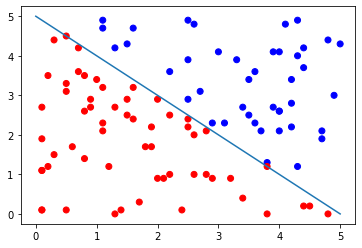

In [6]:
colors = [ 'r' if i == 0 else 'b' for i in Y ]
x = X[:,0]
y = X[:,1]
plt.scatter(x,y, color=colors)
plt.plot([0,5],[f(0), f(5)])

## Sigmoid Function & Accuracy

In [1]:
def sigmoid(fx):
  return 1 / (1 + np.exp(-fx))

def calc_Accuracy(y,yp):
  nbr = 0
  l = len(y)
  index = []
  for i in range(l):
    if y[i] == yp[i] :
      nbr += 1
    else : 
      index.append(i)
  return nbr/l,index


In [8]:
def calc_y(x,w1,w2,b):
  return -b/w2 - w1/w2 * x

## Cost Functions

In [9]:
def mae_cost(y,yp):
  return np.mean(np.abs(yp-y))

def mse_cost(y,yp):
  return np.mean((yp-y)**2)

def binary_crossentropy(y,yp):
  return -np.mean(y*np.log(yp)+(1-y)*np.log(1-yp))

In [10]:
lr=0.001
n_iters=100000
e=1e-10

## Cross Entropy



 iteration    100 -> Accuracy : 0.440  | Cross Entropy: 12.894 | W : [0.0234,0.0149] | bias: -0.0092


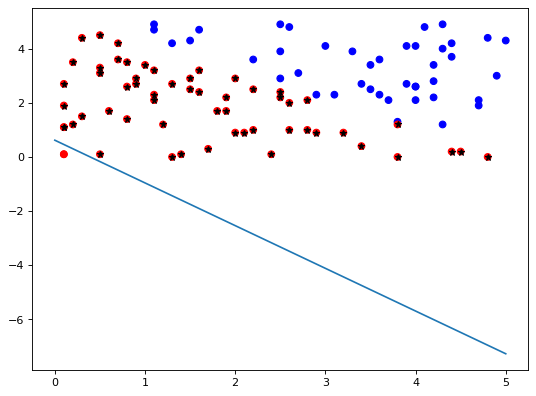


 iteration    300 -> Accuracy : 0.450  | Cross Entropy: 12.664 | W : [0.0558,0.0312] | bias: -0.0320


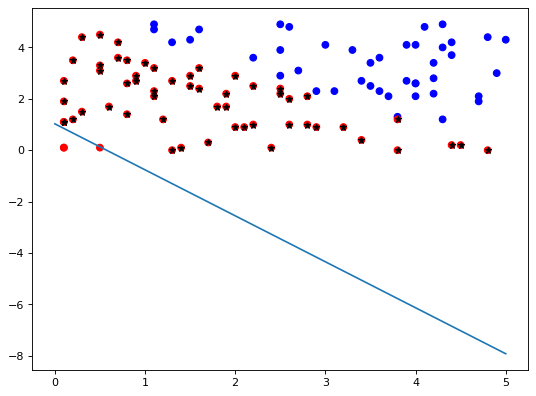


 iteration    900 -> Accuracy : 0.500  | Cross Entropy: 11.513 | W : [0.1073,0.0424] | bias: -0.1135


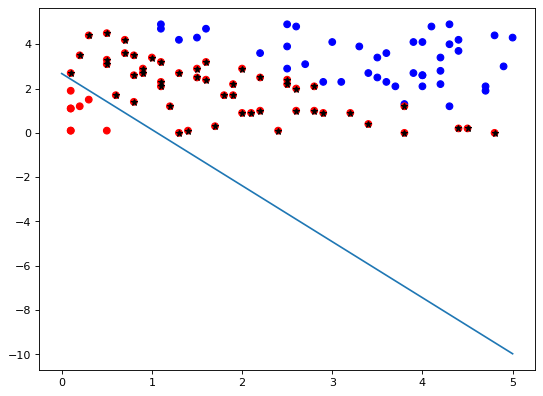


 iteration   2700 -> Accuracy : 0.690  | Cross Entropy: 07.138 | W : [0.1883,0.0551] | bias: -0.3623


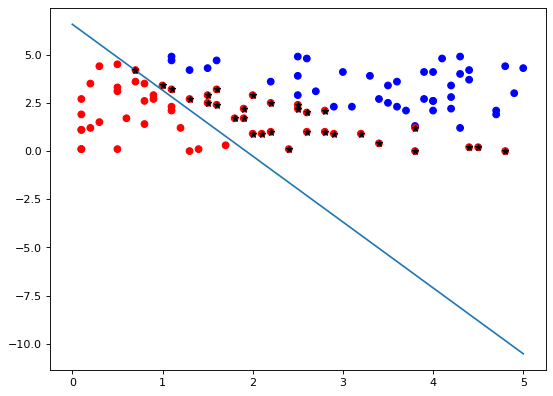


 iteration   8100 -> Accuracy : 0.850  | Cross Entropy: 03.454 | W : [0.3235,0.1563] | bias: -1.0213


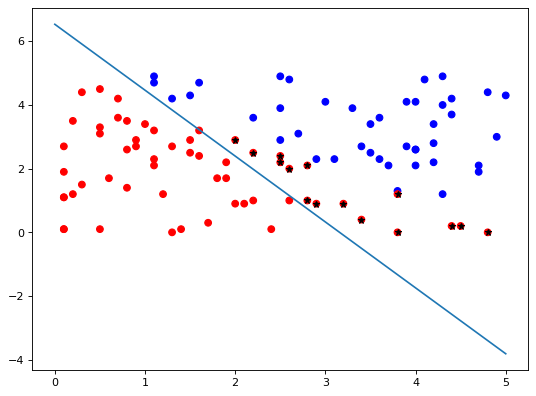


 iteration  24300 -> Accuracy : 0.940  | Cross Entropy: 01.382 | W : [0.5715,0.4312] | bias: -2.4616


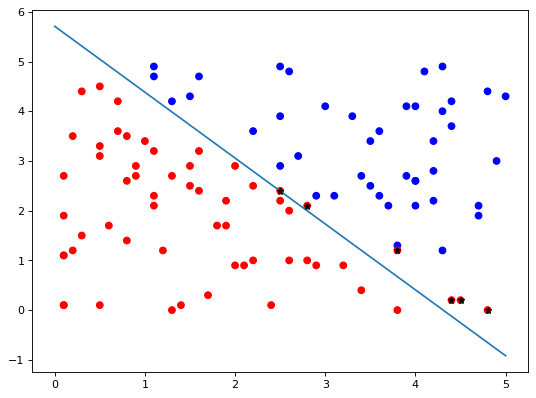


 iteration  72900 -> Accuracy : 0.990  | Cross Entropy: 00.230 | W : [1.0082,0.8979] | bias: -4.8911


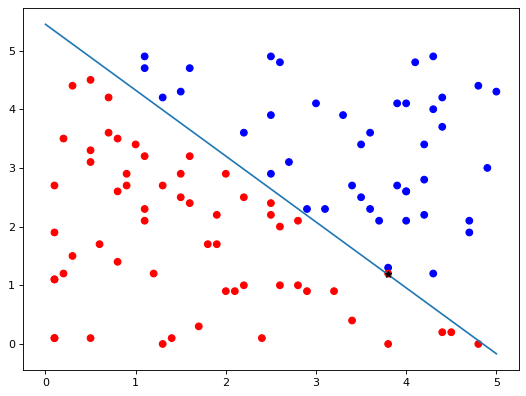


 iteration  99999 -> Accuracy : 1.000  | Cross Entropy: 00.000 | W : [1.1727,1.0693] | bias: -5.7813


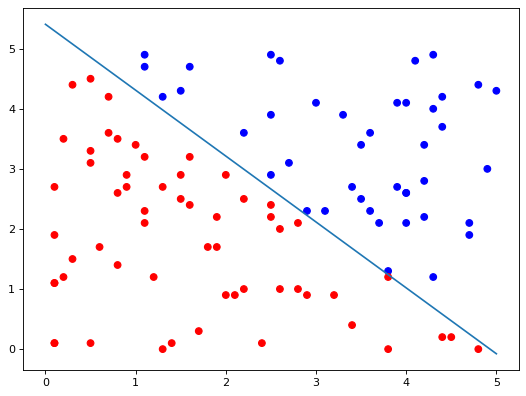

(-5.781268619073467, array([1.17274602, 1.06931883]))

In [11]:
def fitEntropy(X,Y):
  bias=0
  W=np.array([0.,0.])
  n_samples,n_features=X.shape
  accur = 0
  m =100;
  for i in range(n_iters):
    linear_model=np.dot(X,W)+bias
    y_predicted=sigmoid(linear_model)
    dW=(1/n_samples)*np.dot(X.T,(y_predicted-Y))
    dbias=(1/n_samples)*np.sum(y_predicted-Y)
    W-=lr*dW 
    bias-=lr*dbias
    y_predicted = np.round(y_predicted) # 0  1
    accur,indexs = calc_Accuracy(Y,y_predicted)
    y_predicted = np.clip(y_predicted, e, 1-e) #  0.00001 0.99999
    crossentropy = binary_crossentropy(Y, y_predicted)
    if(i == m or i == n_iters-1 ):
      m = m * 3;
      print("\n iteration {:6} -> Accuracy : {:3.3f}  | Cross Entropy: {:06.3f} | W : [{:.4f},{:.4f}] | bias: {:.4f}".
            format(i, accur, crossentropy, W[0], W[1], bias))
      x1,x2 = 0,5
      y1,y2 = calc_y(x1,W[0],W[1],bias),calc_y(x2,W[0],W[1],bias)
      plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
      plt.scatter(x,y, color=colors)
      plt.plot([x1,x2],[y1,y2])
      plt.plot(x[indexs],y[indexs],'k*' )
      plt.show()
  return bias,W
fitEntropy(X,Y)

## MSE


 iteration    100 -> Accuracy : 0.440  | MSE: 00.560 | W : [0.0125,0.0082] | bias: -0.0043


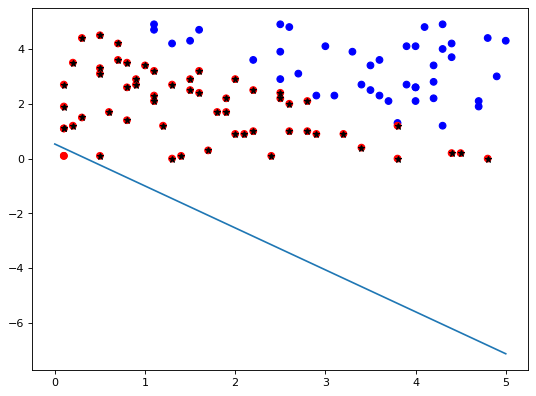


 iteration    300 -> Accuracy : 0.440  | MSE: 00.560 | W : [0.0327,0.0200] | bias: -0.0144


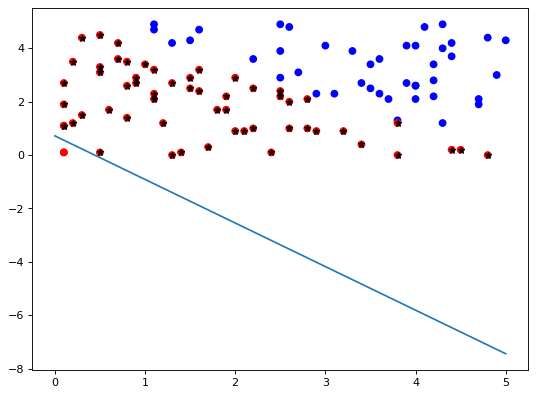


 iteration    900 -> Accuracy : 0.470  | MSE: 00.530 | W : [0.0709,0.0352] | bias: -0.0515


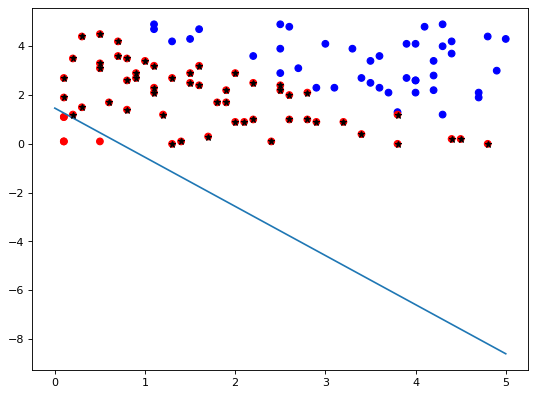


 iteration   2700 -> Accuracy : 0.550  | MSE: 00.450 | W : [0.1270,0.0385] | bias: -0.1764


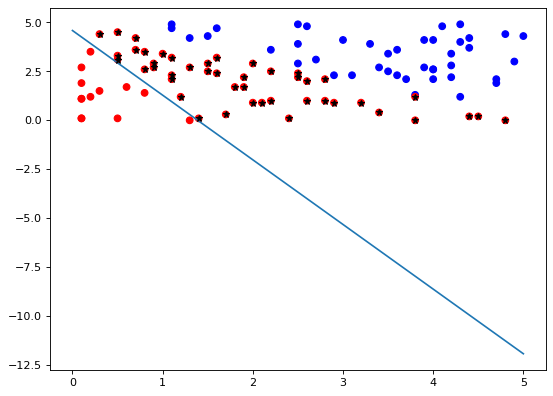


 iteration   8100 -> Accuracy : 0.790  | MSE: 00.210 | W : [0.2208,0.0674] | bias: -0.5307


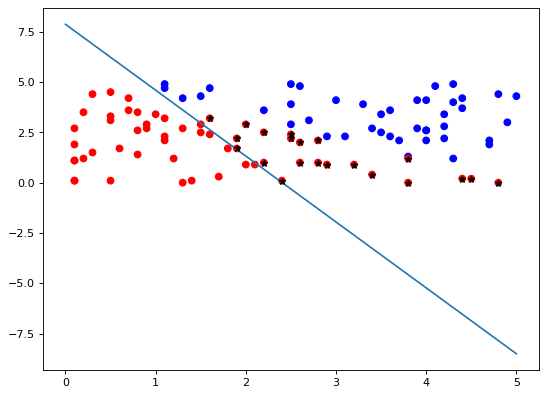


 iteration  24300 -> Accuracy : 0.920  | MSE: 00.080 | W : [0.3617,0.2240] | bias: -1.3801


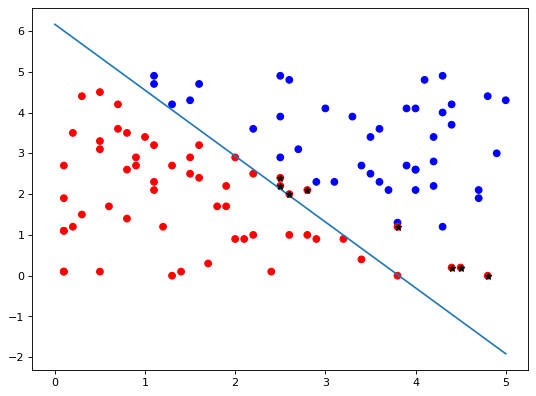


 iteration  72900 -> Accuracy : 0.980  | MSE: 00.020 | W : [0.6182,0.5246] | bias: -2.9113


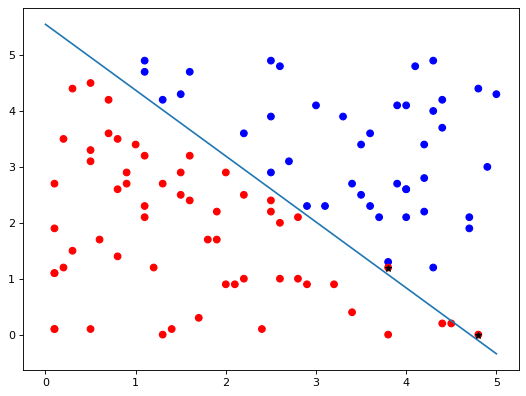


 iteration  99999 -> Accuracy : 0.990  | MSE: 00.010 | W : [0.7188,0.6345] | bias: -3.4765


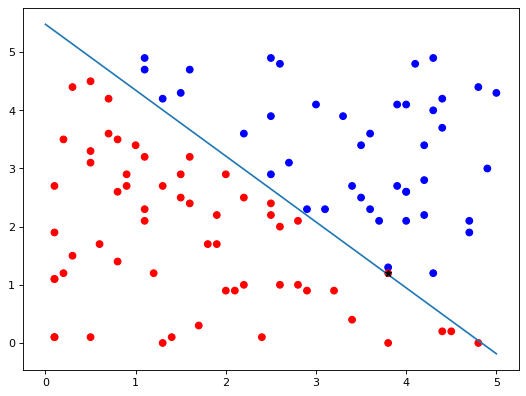

(-3.4765068443064355, array([0.71883664, 0.6344732 ]))

In [12]:
def fitMAE(X,Y):
  bias=0
  W=np.array([0.,0.])
  n_samples,n_features=X.shape
  accur = 0
  m =100;
  for i in range(n_iters):
    linear_model=np.dot(X,W)+bias
    y_predicted=sigmoid(linear_model)
    
    dW = 2/n_samples * np.dot(X.T,y_predicted * (1-y_predicted) *(y_predicted-Y))
    dbias = 2*np.mean(y_predicted * (1-y_predicted) *(y_predicted-Y))

    W-=lr*dW 
    bias-=lr*dbias
    y_predicted = np.round(y_predicted) # 0  1
    accur,indexs = calc_Accuracy(Y,y_predicted)
    # y_predicted = np.clip(y_predicted, e, 1-e) #  0.00001 0.99999
    mse = mse_cost(Y,y_predicted)

    if(i == m or i == n_iters-1 ):
      m = m * 3;
      print("\n iteration {:6} -> Accuracy : {:3.3f}  | MSE: {:06.3f} | W : [{:.4f},{:.4f}] | bias: {:.4f}".
            format(i, accur, mse, W[0], W[1], bias))
      x1,x2 = 0,5
      y1,y2 = calc_y(x1,W[0],W[1],bias),calc_y(x2,W[0],W[1],bias)
      plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
      plt.scatter(x,y, color=colors)
      plt.plot([x1,x2],[y1,y2])
      plt.plot(x[indexs],y[indexs],'k*' )
      plt.show()
  return bias,W
fitMAE(X,Y)

## MAE


 iteration    100 -> Accuracy : 0.480  | MAE: 00.520 | W : [0.0134,0.0090] | bias: -0.0162


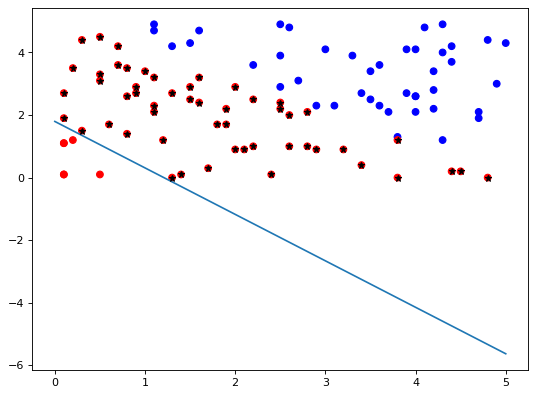


 iteration    300 -> Accuracy : 0.480  | MAE: 00.520 | W : [0.0396,0.0266] | bias: -0.0482


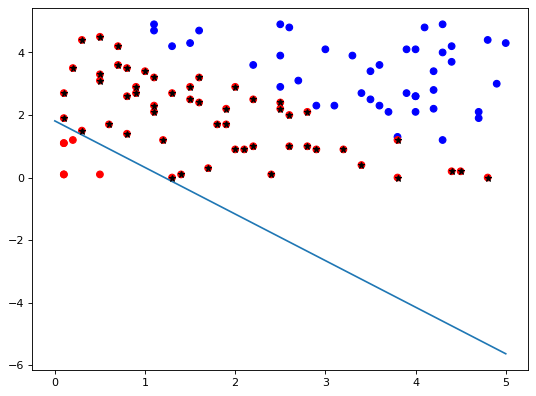


 iteration    900 -> Accuracy : 0.480  | MAE: 00.520 | W : [0.1127,0.0740] | bias: -0.1442


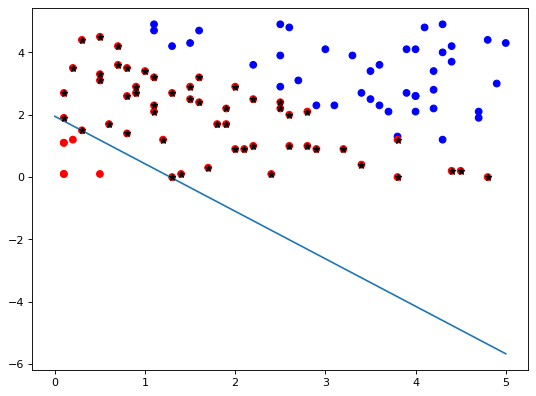


 iteration   2700 -> Accuracy : 0.550  | MAE: 00.450 | W : [0.2623,0.1488] | bias: -0.4322


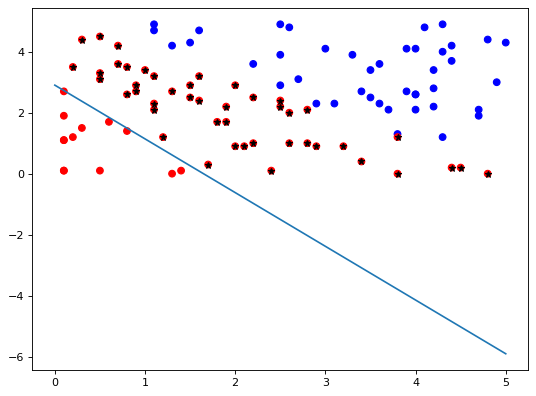


 iteration   8100 -> Accuracy : 0.810  | MAE: 00.190 | W : [0.5030,0.1882] | bias: -1.2962


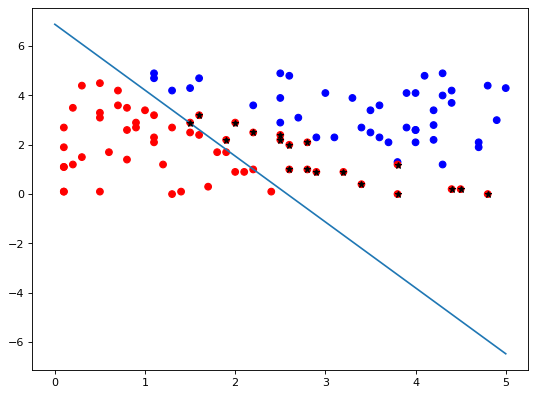


 iteration  24300 -> Accuracy : 0.910  | MAE: 00.090 | W : [0.9723,0.5625] | bias: -3.8882


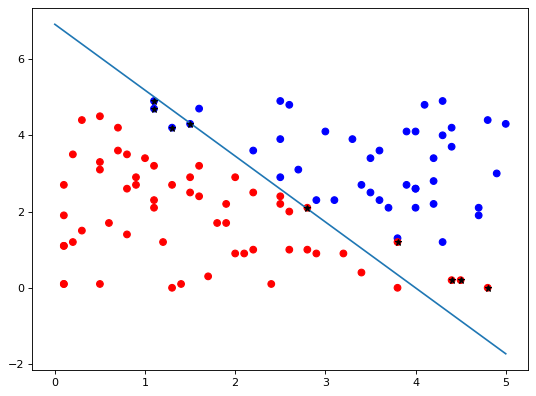


 iteration  72900 -> Accuracy : 0.980  | MAE: 00.020 | W : [2.2310,2.1420] | bias: -11.6642


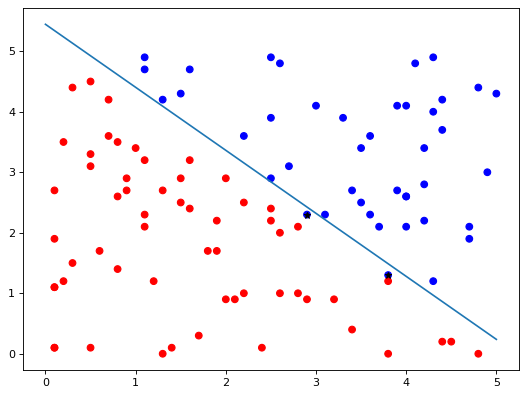


 iteration  99999 -> Accuracy : 0.980  | MAE: 00.020 | W : [3.0237,2.9700] | bias: -16.0000


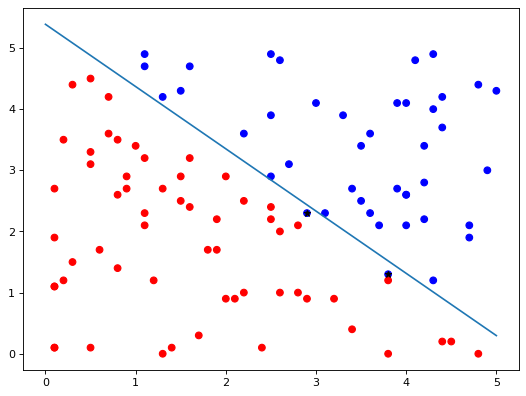

(-15.99999999996934, array([3.02369267, 2.96999743]))

In [13]:
def fitMAE(X,Y):
  bias=0
  W=np.array([0.,0.])
  n_samples,n_features=X.shape
  accur = 0
  m =100;
  for i in range(n_iters):
    linear_model=np.dot(X,W)+bias
    y_predicted=sigmoid(linear_model)

    dbias =  [ -1 if i<j else 1  for i,j in zip(y_predicted,Y)]
    dW = 1/n_samples * np.dot(X.T, dbias * y_predicted * (1-y_predicted))
    dbias = np.mean(dbias)
    
    W-=lr*dW 
    bias-=lr*dbias
    y_predicted = np.round(y_predicted) # 0  1
    accur,indexs = calc_Accuracy(Y,y_predicted)
    # y_predicted = np.clip(y_predicted, e, 1-e) #  0.00001 0.99999
    mae = mae_cost(Y,y_predicted)

    if(i == m or i == n_iters-1 ):
      m = m * 3;
      print("\n iteration {:6} -> Accuracy : {:3.3f}  | MAE: {:06.3f} | W : [{:.4f},{:.4f}] | bias: {:.4f}".
            format(i, accur, mae, W[0], W[1], bias))
      x1,x2 = 0,5
      y1,y2 = calc_y(x1,W[0],W[1],bias),calc_y(x2,W[0],W[1],bias)
      plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
      plt.scatter(x,y, color=colors)
      plt.plot([x1,x2],[y1,y2])
      plt.plot(x[indexs],y[indexs],'k*' )
      plt.show()
  return bias,W
fitMAE(X,Y)